In [3]:
import torch 
import numpy as np 
import pandas as pd 
import h5py
from torch.utils.data.dataset import Dataset
import matplotlib.pyplot as plt

In [2]:
directory = '/home/igeor/MSC-THESIS/data/h5'
image_names=['gogo', 'saintjohn', 'dionisios', 'fanourios', 'odigitria', 'minos']

image_filepaths = [directory + '/spec/' + x + '.hdf5' for x in image_names]

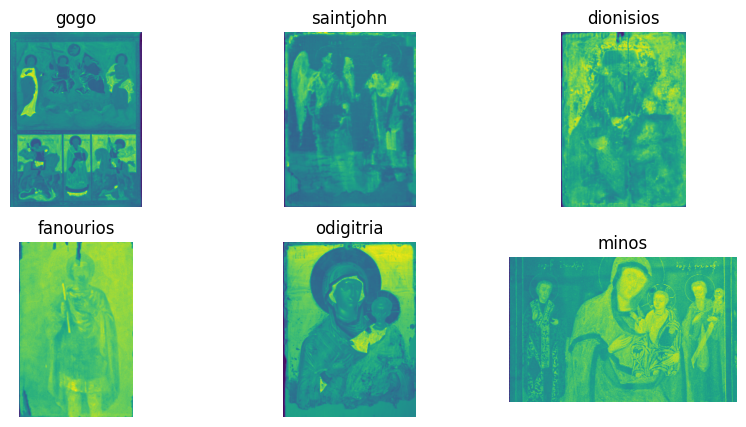

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))

for i in range(2):
    for j in range(3):
        idx = i*3 + j

        f = h5py.File(image_filepaths[idx], 'r')
        spec_image = f['Experiments/__unnamed__/data'][()] # numpy.ndarray 
        f.close()
        spec_image = spec_image.reshape(
            spec_image.shape[0], spec_image.shape[1], spec_image.shape[2]
        )
        axes[i, j].set_axis_off()
        # axes[i, j].yaxis('off')
        axes[i, j].imshow(spec_image.sum(axis=2))
        axes[i, j].set_title(image_names[idx])

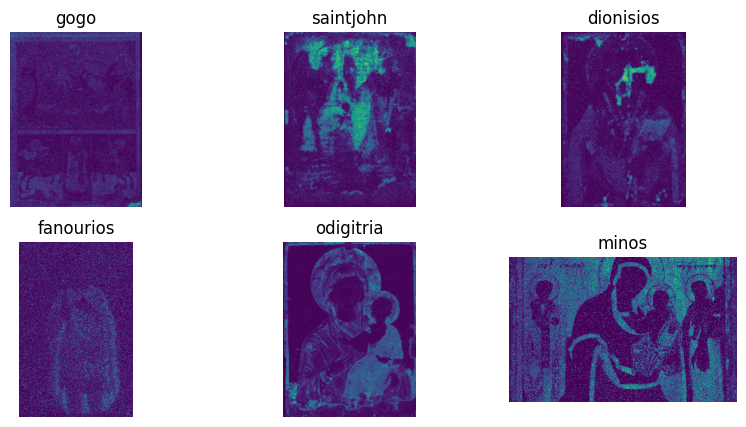

In [15]:
target_elems=['S_K','K_K','Ca_K','Cr_K','Mn_K','Fe_K','Cu_K','Zn_K','Sr_K','Au_L','Hg_L','Pb_L']
target_to_viz = 0 

fig, axes = plt.subplots(2, 3, figsize=(10, 5))

for i in range(2):
    for j in range(3):
        idx = i*3 + j

        ## Open target image file (elemental_maps)
        spec_file = image_filepaths[idx]
        target_file = spec_file.replace("spec", "elem_maps")
        target_file = target_file.replace("hdf5", "dat")
        df = pd.read_csv(target_file , sep='  ', engine='python')
        w, h = df['row'].iloc[-1] + 1, df['column'].iloc[-1] + 1
        target_image = np.array(df[target_elems])
        target_image = np.swapaxes(target_image, 0, 1)
        target_image = np.reshape(target_image, (target_image.shape[0], w, h))

        axes[i, j].set_axis_off()
        axes[i, j].imshow(target_image[target_to_viz])
        axes[i, j].set_title(image_names[idx])